In [1]:
suppressMessages(suppressWarnings(source("config_sing.R")))
print(FD_WORK)
print(FD_RES)

[1] "/home/mount/work"
[1] "/home/mount/work/out/proj_combeffect"


In [2]:
fdiry = file.path(FD_RES, "model_linear", "example_interactive", "target_PER1")
fnames = dir(fdiry)
print(length(fnames))
head(fnames)

[1] 57360


[1] "count_AHR_AIRE.tsv"   "count_AHR_AP1_1.tsv"  "count_AHR_AP1_2.tsv" 
[4] "count_AHR_BATF.tsv"   "count_AHR_BCL6_1.tsv" "count_AHR_BCL6_2.tsv"

In [3]:
TARGET="target_PER1"
#FDIRY = "marginal_filter00"
FDIRY = "example_interactive"

In [4]:
fdiry = file.path(FD_RES, "model_linear", FDIRY, TARGET)
fname = "lm*"
fglob = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)
motifs = sapply(fpaths, function(fpath) {str_remove_all(fpath, pattern = ".*lm_|\\.RDS") })

print(length(motifs))
print(head(motifs))

[1] 28680
  /home/mount/work/out/proj_combeffect/model_linear/example_interactive/target_PER1/lm_AHR_AIRE.RDS 
                                                                                         "AHR_AIRE" 
 /home/mount/work/out/proj_combeffect/model_linear/example_interactive/target_PER1/lm_AHR_AP1_1.RDS 
                                                                                        "AHR_AP1_1" 
 /home/mount/work/out/proj_combeffect/model_linear/example_interactive/target_PER1/lm_AHR_AP1_2.RDS 
                                                                                        "AHR_AP1_2" 
  /home/mount/work/out/proj_combeffect/model_linear/example_interactive/target_PER1/lm_AHR_BATF.RDS 
                                                                                         "AHR_BATF" 
/home/mount/work/out/proj_combeffect/model_linear/example_interactive/target_PER1/lm_AHR_BCL6_1.RDS 
                                                                                 

In [5]:
28680 * 2

[1] 57360

In [6]:
lst_dat = lapply(fpaths, function(fpath){
    lst = readRDS(fpath)
    return(lst)
})

names(lst_dat) = motifs

## Test extract motif pair

In [7]:
dat = lst_dat[[1]][["input20x"]]
fit = dat$fit
print(fit)


Call:
lm(formula = y ~ X + 0)

Coefficients:
       X(Intercept)       XXTFX_DMSO_AHR      XXTFX_DMSO_AIRE  
          3.463e-06            1.484e-05           -3.115e-06  
      XXTFX_Dex_AHR       XXTFX_Dex_AIRE  XXTFX_DMSO_AHR_AIRE  
          4.026e-06           -1.840e-07                   NA  
 XXTFX_Dex_AHR_AIRE  
                 NA  



In [8]:
tmp = names(coef(fit))
tmp = tmp[length(tmp)]
tmp

[1] "XXTFX_Dex_AHR_AIRE"

In [9]:
res = as.data.frame(summary(fit)$coefficients)
res

,Estimate,Std. Error,t value,Pr(>|t|)
,<dbl>,<dbl>,<dbl>,<dbl>
X(Intercept),3.463048e-06,6.639146e-07,5.216105,4.917460e-05
XXTFX_DMSO_AHR,1.483930e-05,1.382048e-06,10.737180,1.653725e-09
XXTFX_DMSO_AIRE,-3.114737e-06,1.382048e-06,-2.253711,3.621899e-02
XXTFX_Dex_AHR,4.026250e-06,1.603506e-06,2.510904,2.124605e-02
XXTFX_Dex_AIRE,-1.840152e-07,1.603506e-06,-0.114758,9.098410e-01


In [10]:
b   = res['XXTFX_Dex_AHR_AIRE', c("Estimate", "Pr(>|t|)")]
b

,Estimate,Pr(>|t|)
,<dbl>,<dbl>
NA,NA,NA


In [11]:
names(lst_dat)[1]

[1] "AHR_AIRE"

## loop through all motif pairs

In [12]:
lst_res = lapply(names(lst_dat), function(mtf){
    dat = lst_dat[[mtf]][["input20x"]]
    fit = dat$fit
    res = as.data.frame(summary(fit)$coefficients)
    
    tmp = names(coef(fit))
    tmp = tmp[length(tmp)]
    b   = res[tmp, c("Estimate", "Pr(>|t|)")]
    b   = c(mtf, b)
    names(b) = c("Motif", "Estimate", "Pvalue")
    return(b)
})

dat = bind_rows(lst_res)
dat = dat %>% na.omit
dat = dat %>% 
    mutate(AdjPvalue = p.adjust(Pvalue, method = "BH")) %>%
    mutate(NLogP = -log10(AdjPvalue)) 
dat$color = ifelse(dat$Motif == "NR_20", "red", "gray50")
head(dat, 10)

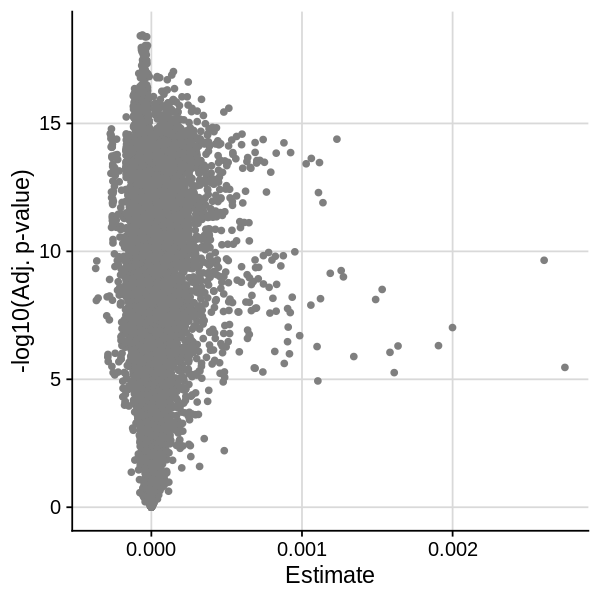

In [42]:
options(repr.plot.height=5, repr.plot.width=5)
gpt = ggplot(dat, aes(x=Estimate, y=NLogP)) + 
    geom_point(color=dat$color) + 
    labs(x = "Estimate", y="-log10(Adj. p-value)") +
    theme_cowplot() + 
    background_grid()
print(gpt)

In [12]:
lst_res = lapply(names(lst_dat), function(mtf){
    dat = lst_dat[[mtf]][["input20x"]]
    fit = dat$fit_log
    res = as.data.frame(summary(fit)$coefficients)
    
    tmp = names(coef(fit))
    tmp = tmp[length(tmp)]
    b   = res[tmp, c("Estimate", "Pr(>|t|)")]
    b   = c(mtf, b)
    names(b) = c("Motif", "Estimate", "Pvalue")
    return(b)
})

In [30]:
dat = bind_rows(lst_res)
dat = dat %>% na.omit
dat = dat %>% 
    mutate(AdjPvalue = p.adjust(Pvalue, method = "BH")) %>%
    mutate(NLogP = -log10(AdjPvalue)) 
dat$color = ifelse(str_detect(dat$Motif, "NR_20"), "red", "gray50")
tmp = dat %>% dplyr::filter(color=="red")
head(dat, 10)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AHR_AP1_1,-0.4169367,0.6910567921,0.915071508,0.03854497,gray50
AHR_AP1_2,-1.0426267,0.1632168927,0.507720771,0.29437507,gray50
AHR_BATF,-1.9612430,0.2280252718,0.605070538,0.21819399,gray50
AHR_BCL6_2,-0.3199989,0.6727082876,0.908715613,0.04157201,gray50
AHR_CCAAT_CEBP,-2.3308242,0.0005136828,0.007667259,2.11535985,gray50
AHR_CREB3_XBP1,-1.0212351,0.5873474685,0.872718579,0.05912578,gray50
AHR_CREB_ATF_1,-1.0197328,0.6684701382,0.907929343,0.04194795,gray50
AHR_CREB_ATF_2,-0.2616444,0.5652846600,0.863242315,0.06386728,gray50
AHR_CTCF,-1.1270657,0.7820614005,0.946485485,0.02388604,gray50


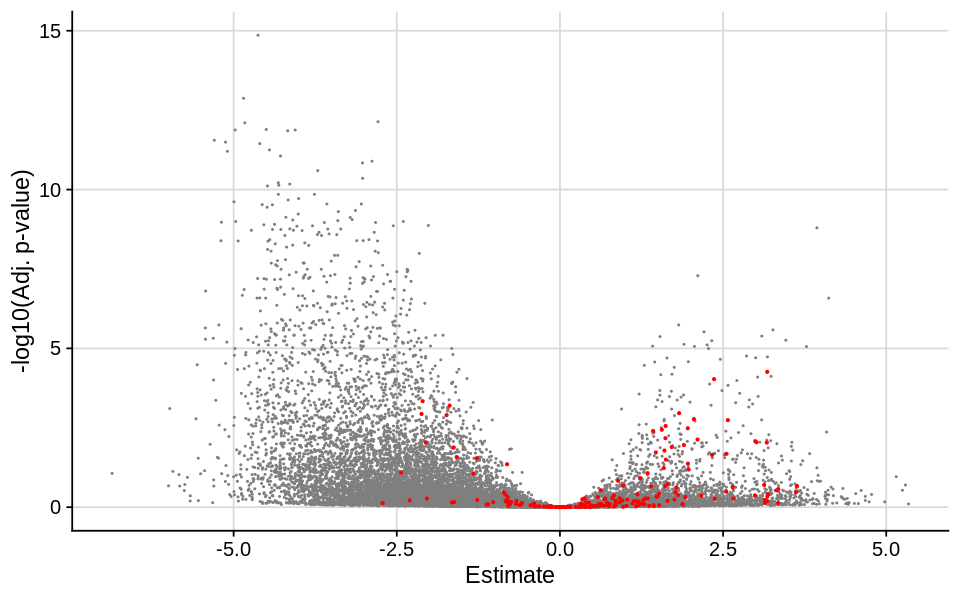

In [31]:
options(repr.plot.height=5, repr.plot.width=8)
gpt = ggplot(dat, aes(x=Estimate, y=NLogP)) + 
    geom_point(color=dat$color, size=0.2) + 
    geom_point(data = tmp, 
               aes(x=Estimate, y=NLogP), size=0.5, color="red") +
    labs(x = "Estimate", y="-log10(Adj. p-value)") +
    theme_cowplot() + 
    background_grid()
print(gpt)

In [32]:
tmp = dat %>% dplyr::filter(NLogP > 2, color=="red") %>% arrange(-NLogP)
dim(tmp)

[1] 19  6

In [40]:
tmp %>% mutate(
    Estimate  = round(Estimate, 3),
    #Pvalue    = round(Pvalue, 5),
    #AdjPvalue = round(AdjPvalue, 5),
    NLogP     = round(NLogP, 3)
)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
NR_20_RUNX_2,3.177,1.284453e-06,5.483849e-05,4.261,red
NR_20_PRDM1,2.362,2.394618e-06,9.323765e-05,4.030,red
GMEB2_2_NR_20,-2.103,1.629317e-05,4.604434e-04,3.337,red
NR_20_ZNF274,-1.690,2.417726e-05,6.333831e-04,3.198,red
NFAT_2_NR_20,1.826,4.695497e-05,1.098186e-03,2.959,red
NR_20_SNAI2,-2.121,4.988812e-05,1.165476e-03,2.933,red
NR_20_TBX_2,-1.737,5.444083e-05,1.261910e-03,2.899,red
NR_20_ZNF282,2.053,7.839304e-05,1.689065e-03,2.772,red
CREB_ATF_1_NR_20,2.574,8.603989e-05,1.819879e-03,2.740,red


In [20]:
dat = bind_rows(lst_res)
dat = dat %>% na.omit
dat = dat %>% 
    mutate(AdjPvalue = p.adjust(Pvalue, method = "BH")) %>%
    mutate(NLogP = -log10(AdjPvalue)) 
dat$color = ifelse(str_detect(dat$Motif, "AP1_1_NR_20"), "red", "gray50")
tmp = dat %>% dplyr::filter(color=="red")
head(dat, 10)

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AHR_AP1_1,-0.4169367,0.6910567921,0.915071508,0.03854497,gray50
AHR_AP1_2,-1.0426267,0.1632168927,0.507720771,0.29437507,gray50
AHR_BATF,-1.9612430,0.2280252718,0.605070538,0.21819399,gray50
AHR_BCL6_2,-0.3199989,0.6727082876,0.908715613,0.04157201,gray50
AHR_CCAAT_CEBP,-2.3308242,0.0005136828,0.007667259,2.11535985,gray50
AHR_CREB3_XBP1,-1.0212351,0.5873474685,0.872718579,0.05912578,gray50
AHR_CREB_ATF_1,-1.0197328,0.6684701382,0.907929343,0.04194795,gray50
AHR_CREB_ATF_2,-0.2616444,0.5652846600,0.863242315,0.06386728,gray50
AHR_CTCF,-1.1270657,0.7820614005,0.946485485,0.02388604,gray50


In [22]:
tmp

Motif,Estimate,Pvalue,AdjPvalue,NLogP,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AP1_1_NR_20,0.3440492,0.1979078,0.5635906,0.2490363,red


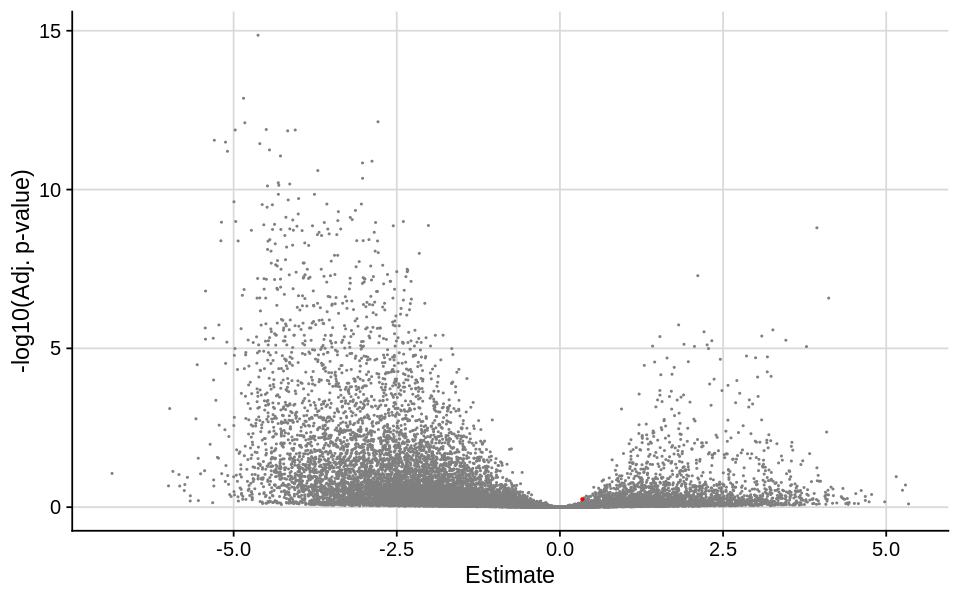

In [23]:
options(repr.plot.height=5, repr.plot.width=8)
gpt = ggplot(dat, aes(x=Estimate, y=NLogP)) + 
    geom_point(color=dat$color, size=0.2) + 
    geom_point(data = tmp, 
               aes(x=Estimate, y=NLogP), size=0.5, color="red") +
    labs(x = "Estimate", y="-log10(Adj. p-value)") +
    theme_cowplot() + 
    background_grid()
print(gpt)

Warning message:
“Removed 12688 rows containing missing values (geom_point).”


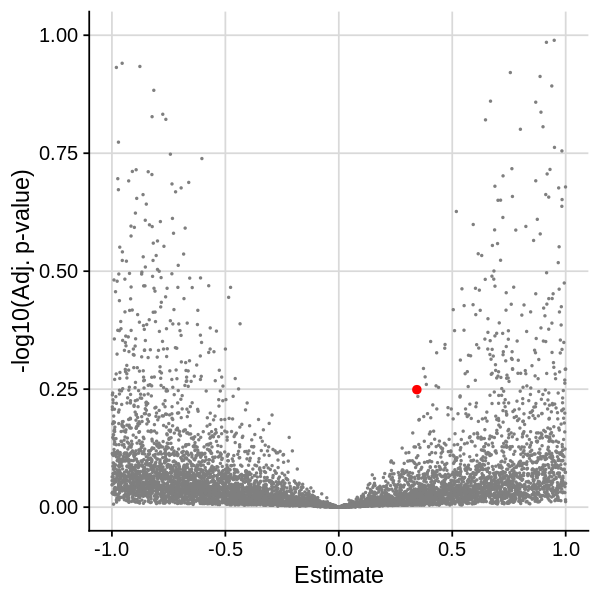

In [27]:
options(repr.plot.height=5, repr.plot.width=5)
gpt = ggplot(dat, aes(x=Estimate, y=NLogP)) + 
    geom_point(color=dat$color, size=0.3) + 
    geom_point(data = tmp, 
               aes(x=Estimate, y=NLogP), size=2, color="red") +
    labs(x = "Estimate", y="-log10(Adj. p-value)") +
    theme_cowplot() + 
    background_grid() + xlim(-1, 1) + ylim(0, 1.0)
print(gpt)

[1] 57360


[1] "count_AHR_AIRE.tsv"   "count_AHR_AP1_1.tsv"  "count_AHR_AP1_2.tsv" 
[4] "count_AHR_BATF.tsv"   "count_AHR_BCL6_1.tsv" "count_AHR_BCL6_2.tsv"

In [3]:
fdiry  = file.path(FD_RES, "model_linear", "interactive_filter00_input20x", "target_PER1")
fnames = dir(fdiry)
lst_res_per1_f00 = lapply(fnames, function(fname){
    fpath = file.path(fdiry, fname)
    lst = readRDS(fpath)
    return(lst)
})

In [4]:
lst_res_per1_f00[[1]]

$fit

Call:
lm(formula = y ~ X + 0)

Coefficients:
       X(Intercept)       XXTFX_DMSO_AHR      XXTFX_DMSO_AIRE  
          6.982e-06            1.154e-05           -6.626e-06  
      XXTFX_Dex_AHR       XXTFX_Dex_AIRE  XXTFX_DMSO_AHR_AIRE  
          3.823e-06           -1.798e-07                   NA  
 XXTFX_Dex_AHR_AIRE  
                 NA  


$cnt
# A tibble: 20 × 7
   Sample     X             Value      Size Group      Norm_Value Lognorm_Value
   <chr>      <fct>         <dbl>     <dbl> <chr>           <dbl>         <dbl>
 1 Input1_20x Input          2620 371718546 Input    0.00000705           -5.15
 2 Input2_20x Input          2473 347635732 Input    0.00000711           -5.15
 3 Input3_20x Input          2522 349994051 Input    0.00000721           -5.14
 4 Input4_20x Input          2714 413508358 Input    0.00000656           -5.18
 5 Input5_20x Input          2380 341110487 Input    0.00000698           -5.16
 6 TFX2_Dex   TFX_Dex_AHR    1004  45413539 TFX_Dex  0.0000221 